In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
# Прочитайте отриману таблицю, використовуючи метод head
# Визначте розмір таблиці за допомогою методу shape
# Визначте типи всіх стовпців за допомогою dataframe.dtype


df = pd.read_csv('2017_jun_final.csv')
print(df.head())
print("\nРозмір таблиці")
print(df.shape)
print("\nТипи всіх стовпців")
print(df.dtypes)

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [22]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

percentage_of_blanks = df.isnull().sum() / len(df) * 100
print(percentage_of_blanks)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [23]:
# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування

columns_to_keep = ['Мова програмування']
columns_to_drop = [col for col in df.columns if col not in columns_to_keep and df[col].isnull().any()]
df_with_dropped_column = df.drop(columns=columns_to_drop)
print(columns_to_drop)
print(df_with_dropped_column.head())
print(df_with_dropped_column.shape)
print(df.shape)

['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']
   N                    Посада Мова програмування Загальний досвід роботи  \
0  1        Junior QA engineer                NaN                     0.5   
1  2        Junior QA engineer                NaN         менше 3 місяців   
2  3         Software Engineer            C#/.NET                       4   
3  4         Software Engineer         JavaScript                       5   
4  5  Senior Software Engineer         JavaScript       10 і більше років   

  Досвід роботи на поточному місці  Зарплата на місяць  \
0                              0.5                 400   
1                  менше 3 місяців                 430   
2                                1                2500   
3                                4                2000   
4                              0.5                4500   

   Зміна зарплати за 12 місяців   Місто   Розмір компанії   Тип компанії  \
0                             0  Харків  

In [24]:
# Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування

percentage_of_blanks_after_dropping = df_with_dropped_column.isnull().mean() * 100
print(percentage_of_blanks_after_dropping)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [25]:
# Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

df_cleaned = df.dropna()
print(df_cleaned)

Empty DataFrame
Columns: [N, Посада, Мова програмування, Спеціалізація, Загальний досвід роботи, Досвід роботи на поточному місці, Зарплата на місяць, Зміна зарплати за 12 місяців, Місто, Розмір компанії, Тип компанії, Стать, Вік, Освіта, Університет, Ще студент, Рівень англійської, Предметна область, Дата заповнення, User.Agent, exp, current_job_exp, salary, Валюта, cls]
Index: []

[0 rows x 25 columns]


In [26]:
# Визначте новий розмір таблиці за допомогою методу shape

print(df_cleaned.shape)

(0, 25)


In [27]:
# Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
df_python = df[df['Мова програмування'].str.contains('Python', na=False, case=False)]
print(df_python.head())

       N                    Посада Мова програмування Спеціалізація  \
12    13         Software Engineer             Python           NaN   
68    69         Software Engineer             Python           NaN   
87    88  Junior Software Engineer             Python           NaN   
114  115  Junior Software Engineer             Python           NaN   
143  144  Junior Software Engineer             Python           NaN   

    Загальний досвід роботи Досвід роботи на поточному місці  \
12                        1                  менше 3 місяців   
68                      1.5                              0.5   
87                      0.5                              0.5   
114                     1.5                              0.5   
143                       1                                1   

     Зарплата на місяць  Зміна зарплати за 12 місяців Місто Розмір компанії  \
12                  800                           200  Київ      до 50 осіб   
68                  900       

In [28]:
# Визначте розмір таблиці python_data за допомогою методу shape
print(df_python.shape)

(207, 25)


In [29]:
# Використовуючи метод groupby, виконайте групування за стовпчиком "Посада

grouped_data = df.groupby('Посада')
print(grouped_data)

In [30]:
# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

agg_data = df.groupby('Посада').agg({'Зарплата на місяць': ['min', 'max']}).reset_index()
# agg_data = grouped_data['Зарплата на місяць'].agg(['min', 'max']).reset_index()
print(agg_data)

                                        Посада Зарплата на місяць       
                                                              min    max
0                             Business analyst                200   5000
1                                          DBA                380   6000
2                Data Scientist / Data Analyst                150   8000
3                                     Designer                100   4000
4                                       DevOps                194  10000
5   Director of Engineering / Program Director               1500  34000
6                                    ERP / CRM                100   6000
7                                Game designer                150   6800
8                                           HR                100   7000
9                                   HTML coder                154   3000
10                          Junior QA engineer                 96   2000
11                    Junior Software Engineer     

In [31]:
# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg

agg_data.columns = [' '.join(col).strip() if type(col) is tuple else col for col in agg_data.columns]

def fill_avg_salary(row):
    return (row['Зарплата на місяць min'] + row['Зарплата на місяць max']) / 2

agg_data['Зарплата на місяць avg'] = agg_data.apply(fill_avg_salary, axis=1)

print(agg_data)

                                        Посада  Зарплата на місяць min  \
0                             Business analyst                     200   
1                                          DBA                     380   
2                Data Scientist / Data Analyst                     150   
3                                     Designer                     100   
4                                       DevOps                     194   
5   Director of Engineering / Program Director                    1500   
6                                    ERP / CRM                     100   
7                                Game designer                     150   
8                                           HR                     100   
9                                   HTML coder                     154   
10                          Junior QA engineer                      96   
11                    Junior Software Engineer                      75   
12                                   M

In [32]:
# Створіть описову статистику за допомогою методу describe для нового стовпчика.

avg_stats = agg_data['Зарплата на місяць avg'].describe().round(2)
print(avg_stats)

count       32.00
mean      3449.23
std       3093.89
min        900.00
25%       1820.50
50%       2837.50
75%       3756.25
max      17750.00
Name: Зарплата на місяць avg, dtype: float64


In [33]:
# Збережіть отриману таблицю в CSV файл

output_file_path = 'agg_data.csv'
agg_data.to_csv(output_file_path, index=False)

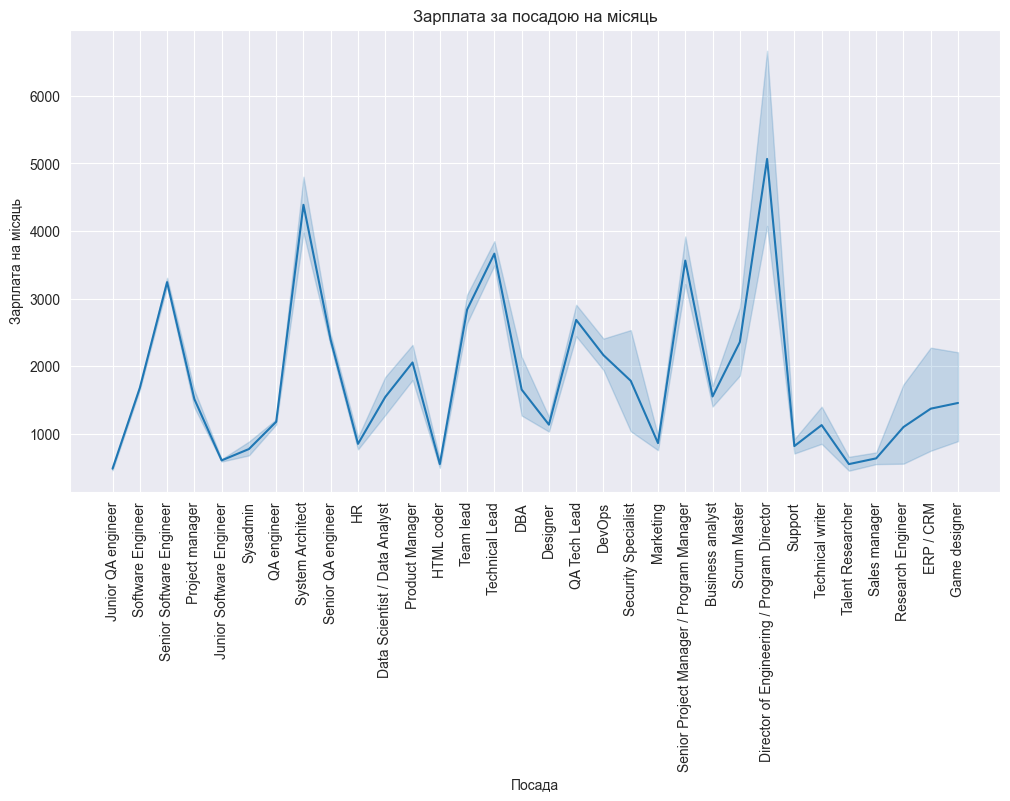

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Посада", y="Зарплата на місяць", data=df)
plt.xticks(rotation=90)
plt.title('Зарплата за посадою на місяць')
plt.show()

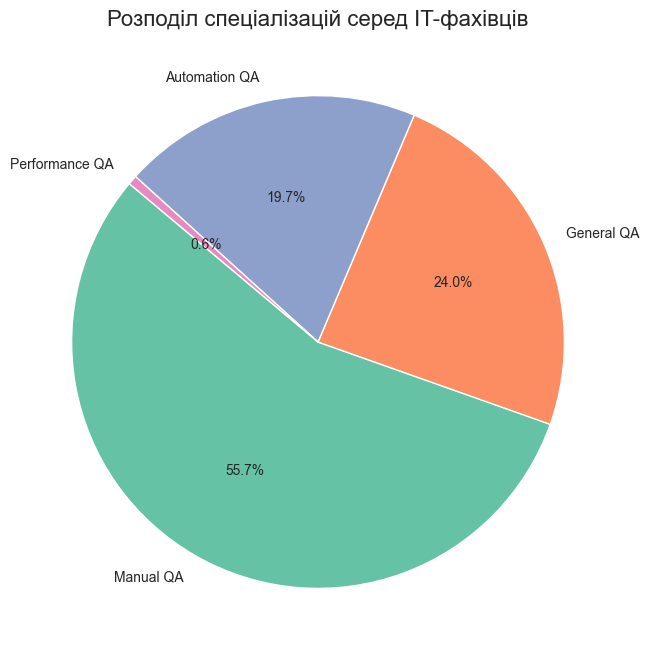

In [35]:
# Підрахунок кількості співробітників за кожною спеціалізацією
specialization_counts = df['Спеціалізація'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(specialization_counts, labels=specialization_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Розподіл спеціалізацій серед IT-фахівців', fontsize=16)
plt.show()


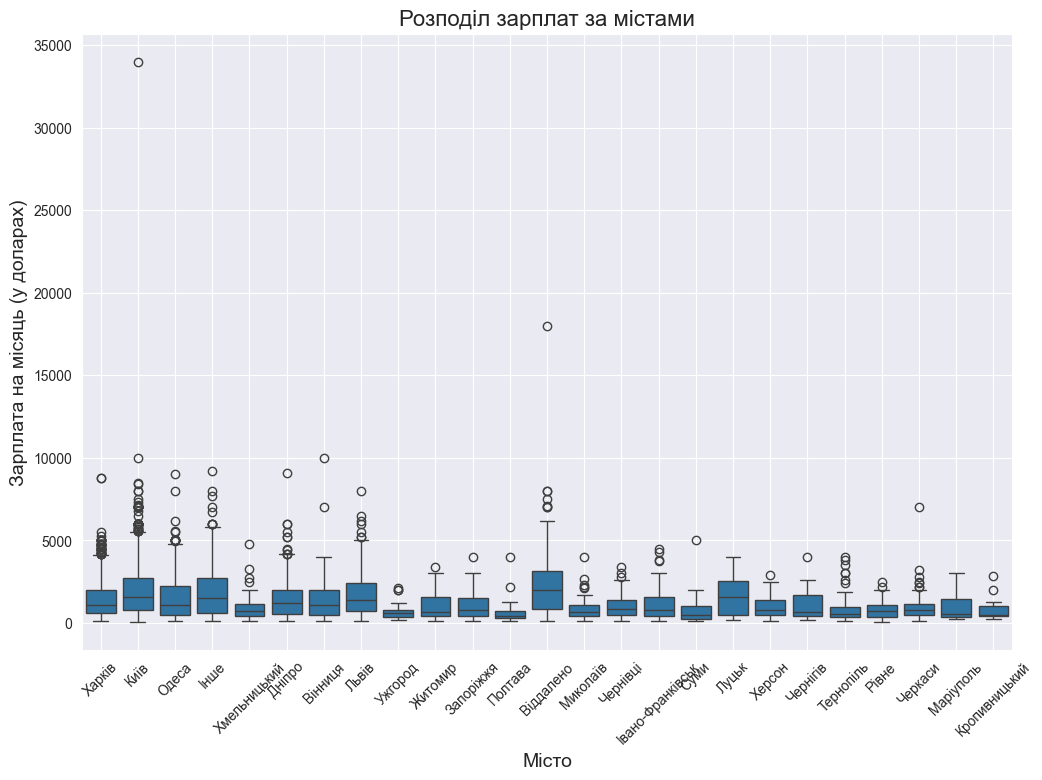

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Місто', y='Зарплата на місяць', data=df)
plt.title('Розподіл зарплат за містами', fontsize=16)
plt.xlabel('Місто', fontsize=14)
plt.ylabel('Зарплата на місяць (у доларах)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

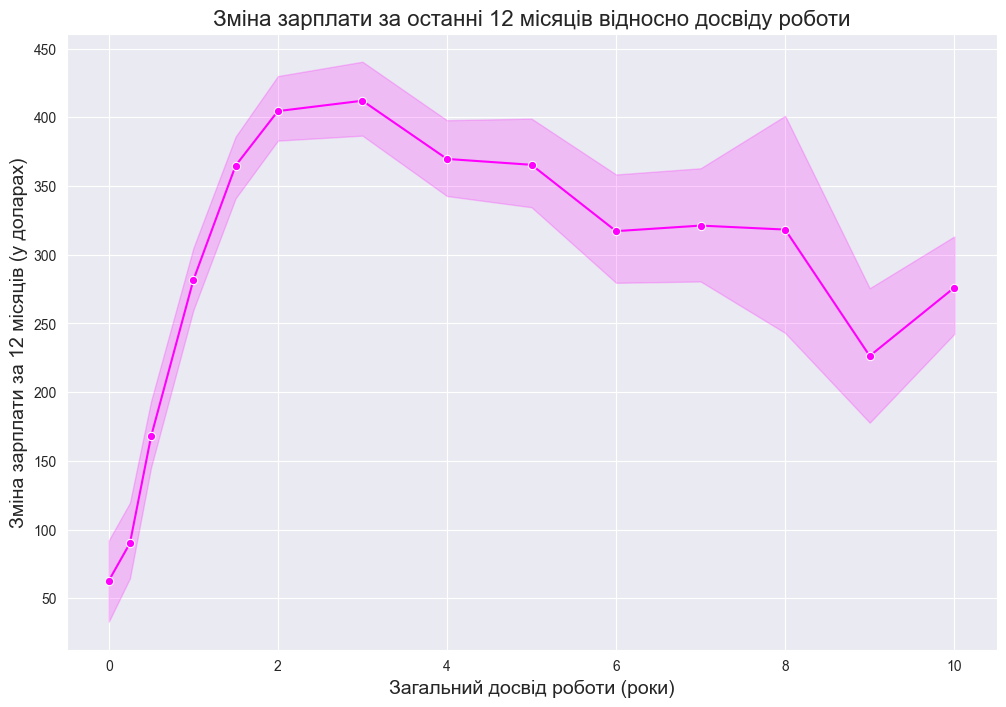

In [37]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='exp', y='Зміна зарплати за 12 місяців', data=df, marker='o', color='magenta')
plt.title('Зміна зарплати за останні 12 місяців відносно досвіду роботи', fontsize=16)
plt.xlabel('Загальний досвід роботи (роки)', fontsize=14)
plt.ylabel('Зміна зарплати за 12 місяців (у доларах)', fontsize=14)
plt.grid(True)
plt.show()

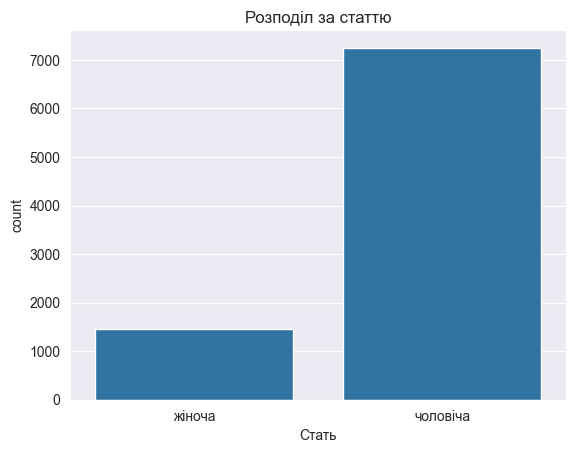

In [38]:
sns.countplot(x="Стать", data=df)
plt.title('Розподіл за статтю')
plt.show()